In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df=pd.read_csv('onlinefoods.csv')
df.head(15)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [3]:
df.shape

(388, 13)

In [4]:
df['index']=df.index

In [5]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,index
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,0
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,2
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,3
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,4


In [6]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12', 'index'],
      dtype='object')

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [9]:
df['Occupation'].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [10]:
df['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [11]:
df['Educational Qualifications'].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [12]:
df['Output'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Feedback'].unique()

array(['Positive', 'Negative '], dtype=object)

In [14]:
df['Unnamed: 12'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
index                         0
dtype: int64

In [16]:
df.drop('latitude',axis=1,inplace=True)
df.drop('longitude',axis=1,inplace=True)
df.drop('Unnamed: 12',axis=1,inplace=True)
df.drop('Pin code',axis=1,inplace=True)



df.shape

(388, 10)

In [17]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback,index
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive,0
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes,Positive,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes,Negative,2
3,22,Female,Single,Student,No Income,Graduate,6,Yes,Positive,3
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes,Positive,4


# Here we have 7 catogorical feature lets do the feature engineering
    first we assign the numerical values to each catogory of the each feature as below
    Gender:
            female=0
             male=1
             
    Marital Status:
                single=0
                married=1
                prefer not to say =2
               
    occupation:
            Student:0
            Employee:1
            Self Employeed:2
            House wife:3
            
     monthly income:
                    No Income=0
                    Below Rs.10000=1
                    More than 50000=2
                    10001 to 25000=3
                    25001 to 50000=4
                    
     Educational Qualifications:
                                 Post Graduate=0
                                 Graduate=1
                                 Ph.d=2
                                 Uneducated=3
                                 School=4
      
      output:
              no=0
              yes=1
              
      feedback:
                negitive=0
                positive=1

In [28]:
df['Gender'].replace(to_replace='Female',value=0,inplace=True)
df['Gender'].replace(to_replace='Male',value=1,inplace=True)

df['Marital Status'].replace(to_replace='Single',value=0,inplace=True)
df['Marital Status'].replace(to_replace='Married',value=1,inplace=True)
df['Marital Status'].replace(to_replace='Prefer not to say',value=2,inplace=True)




df['Occupation'].replace(to_replace='Student',value=0,inplace=True)
df['Occupation'].replace(to_replace='Employee',value=1,inplace=True)
df['Occupation'].replace(to_replace='Self Employeed',value=2,inplace=True)
df['Occupation'].replace(to_replace='House wife',value=3,inplace=True)




df['Feedback'].replace(to_replace='Negative ',value=0,inplace=True)
df['Feedback'].replace(to_replace='Positive',value=1,inplace=True)




df['Monthly Income'].replace(to_replace='No Income',value=0,inplace=True)
df['Monthly Income'].replace(to_replace='Below Rs.10000',value=1,inplace=True)
df['Monthly Income'].replace(to_replace='10001 to 25000',value=2,inplace=True)
df['Monthly Income'].replace(to_replace='25001 to 50000',value=3,inplace=True)
df['Monthly Income'].replace(to_replace='More than 50000',value=4,inplace=True)


df['Educational Qualifications'].replace(to_replace='Uneducated',value=0,inplace=True)
df['Educational Qualifications'].replace(to_replace='School',value=1,inplace=True)
df['Educational Qualifications'].replace(to_replace='Graduate',value=2,inplace=True)
df['Educational Qualifications'].replace(to_replace='Post Graduate',value=3,inplace=True)
df['Educational Qualifications'].replace(to_replace='Ph.D',value=4,inplace=True)
              
df['Output'].replace(to_replace='No',value=0,inplace=True)
df['Output'].replace(to_replace='Yes',value=1,inplace=True)
                
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback,index
0,20,0,0,0,0,3,4,1,1,0
1,24,0,0,0,1,2,3,1,1,1
2,22,1,0,0,1,3,3,1,0,2
3,22,0,0,0,0,2,6,1,1,3
4,22,1,0,0,1,3,4,1,1,4


In [29]:
df.sample(50)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback,index
147,24,0,0,0,0,3,4,1,1,147
103,24,0,0,0,0,4,3,1,1,103
309,23,1,0,0,1,3,2,1,0,309
353,27,1,1,2,3,2,6,0,1,353
187,25,1,0,1,2,2,2,1,1,187
133,19,1,0,0,0,2,2,0,0,133
101,23,1,0,0,0,3,2,1,1,101
46,24,0,0,0,0,3,3,1,1,46
344,26,1,0,1,2,2,2,0,0,344
12,23,1,0,0,0,3,5,1,1,12


In [30]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback',
       'index'],
      dtype='object')

In [32]:
df['Gender']=df['Gender'].astype(int)
df['Marital Status']=df['Marital Status'].astype(int)
df['Occupation']=df['Occupation'].astype(int)
df['Educational Qualifications']=df['Educational Qualifications'].astype(int)
df['Output']=df['Output'].astype(int)
df['Feedback']=df['Feedback'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int32
 2   Marital Status              388 non-null    int32
 3   Occupation                  388 non-null    int32
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int32
 6   Family size                 388 non-null    int64
 7   Output                      388 non-null    int32
 8   Feedback                    388 non-null    int32
 9   index                       388 non-null    int64
dtypes: int32(6), int64(4)
memory usage: 21.3 KB


In [35]:
df.corr()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback,index
Age,1.000000,0.062038,0.615885,0.620027,0.562194,-0.100036,0.169982,-0.248052,-0.198170,0.134777
Gender,0.062038,1.000000,-0.024589,0.001572,0.130628,-0.074613,-0.082488,0.034701,-0.045486,0.037532
Marital Status,0.615885,-0.024589,1.000000,0.581582,0.539543,-0.109301,0.128217,-0.281810,-0.209843,0.195493
Occupation,0.620027,0.001572,0.581582,1.000000,0.650949,-0.331221,0.156869,-0.240721,-0.180216,0.207605
Monthly Income,0.562194,0.130628,0.539543,0.650949,1.000000,-0.027924,0.077944,-0.222303,-0.158051,0.225130
Educational Qualifications,-0.100036,-0.074613,-0.109301,-0.331221,-0.027924,1.000000,-0.051527,0.079595,0.121088,-0.167953
Family size,0.169982,-0.082488,0.128217,0.156869,0.077944,-0.051527,1.000000,-0.043780,-0.010148,-0.071055
Output,-0.248052,0.034701,-0.281810,-0.240721,-0.222303,0.079595,-0.043780,1.000000,0.592609,-0.162840
Feedback,-0.198170,-0.045486,-0.209843,-0.180216,-0.158051,0.121088,-0.010148,0.592609,1.000000,-0.139168
index,0.134777,0.037532,0.195493,0.207605,0.225130,-0.167953,-0.071055,-0.162840,-0.139168,1.000000


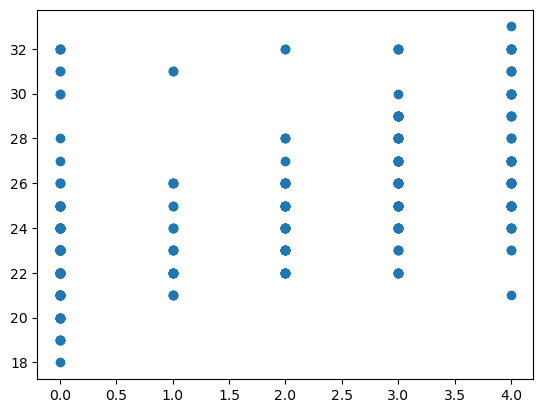

In [48]:
x=df['Monthly Income']
y=df['Age']
plt.scatter(x,y)

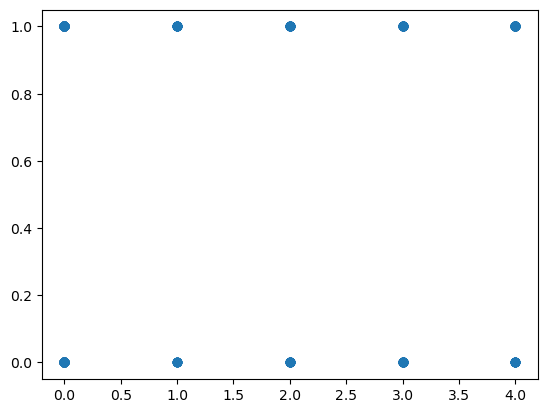

In [49]:
x=df['Monthly Income']
y=df['Gender']
plt.scatter(x,y)

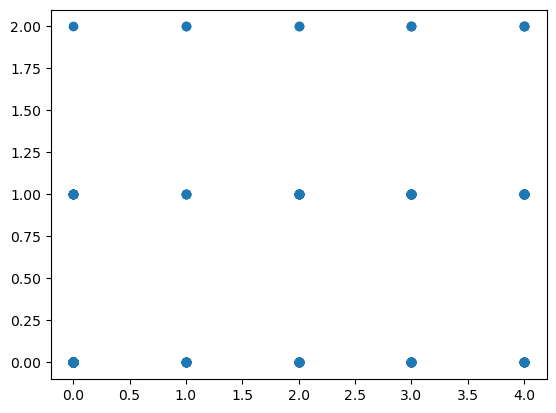

In [50]:
x=df['Monthly Income']
y=df['Marital Status']
plt.scatter(x,y)

<Axes: xlabel='Monthly Income', ylabel='Educational Qualifications'>

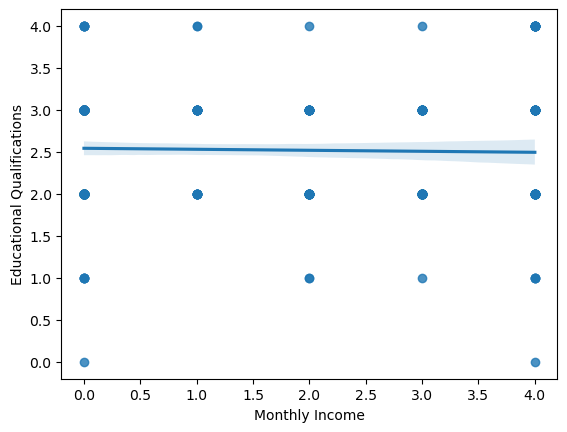

In [43]:
sns.regplot(x=df['Monthly Income'],y=df['Educational Qualifications'],data=df)

<Axes: xlabel='Monthly Income', ylabel='Occupation'>

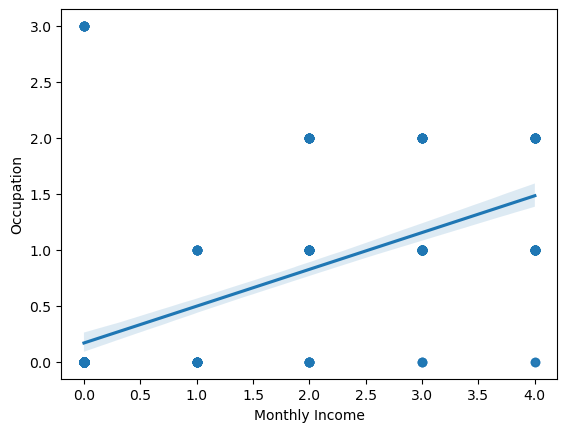

In [44]:
sns.regplot(x=df['Monthly Income'],y=df['Occupation'],data=df)

<Axes: xlabel='Monthly Income', ylabel='Age'>

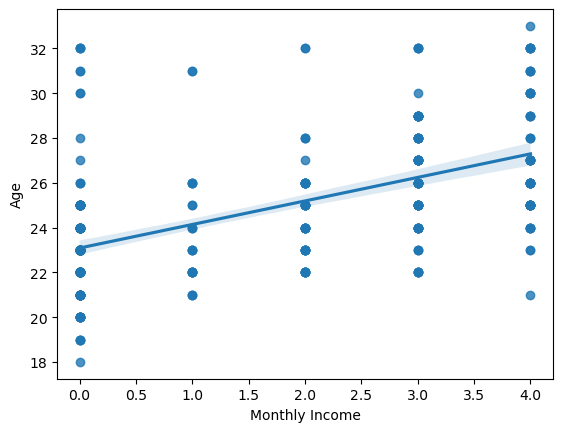

In [45]:
sns.regplot(x=df['Monthly Income'],y=df['Age'],data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

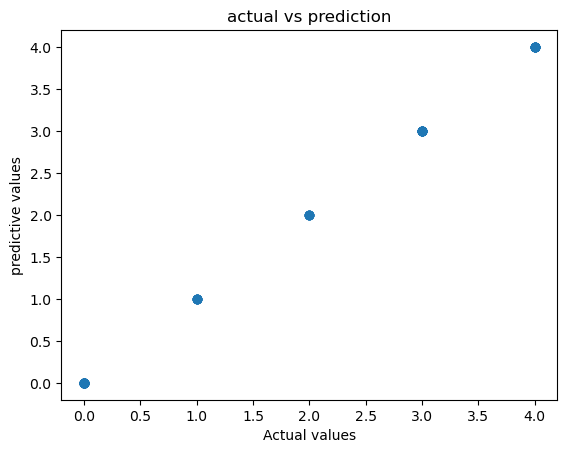

In [46]:
X=df[[ 'Age','Occupation', 'Educational Qualifications','Monthly Income']]
y=df['Monthly Income']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model=LinearRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

predictions=model.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Actual values')
plt.ylabel('predictive values')
plt.title('actual vs prediction')
plt.show

# we can further use these features and use more columns as depend on our requirments